<a href="https://colab.research.google.com/github/NallelyHernandezG/Simulacion-I/blob/main/M%C3%A9todo_de_Aceptaci%C3%B3n_y_Rechazo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

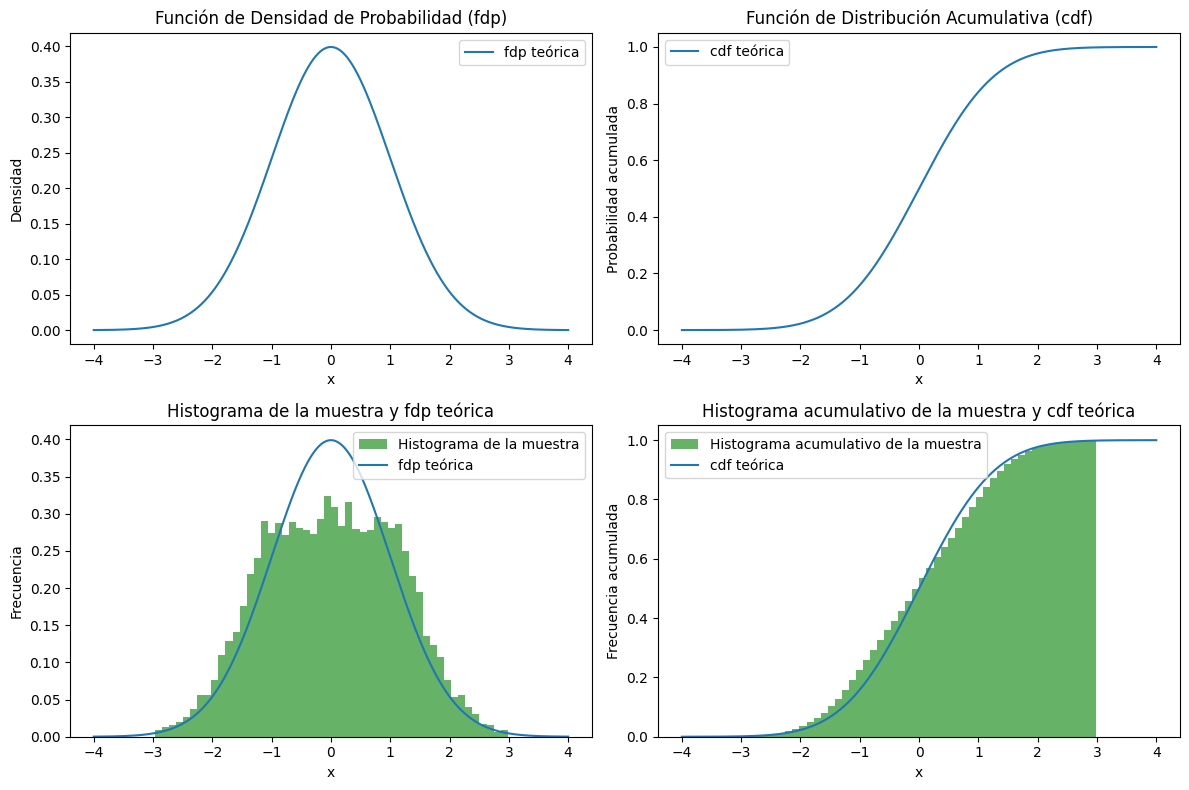

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Parámetros de la distribución normal
mu = 0.0
sigma = 1.0

# Constante c (debe ser >= máximo de f(x)/g(x))
c = np.sqrt(2 * np.e / np.pi)  # Aproximadamente 1.315

# Distribución propuesta (Uniforme en el intervalo [-a, a])
a = 3.0  # Elija un valor adecuado para a

# Función objetivo (Normal estándar)
def target_distribution(x):
    return norm.pdf(x, mu, sigma)

# Distribución propuesta (Uniforme)
def proposal_distribution():
    return np.random.uniform(-a, a)

# Generar muestra usando el método de aceptación y rechazo
def acceptance_rejection_sample(size):
    sample = []
    while len(sample) < size:
        x = proposal_distribution()
        u = np.random.uniform(0, c * 1/(2*a))  # 1/(2a) es la altura de la propuesta uniforme
        if u <= target_distribution(x):
            sample.append(x)
    return np.array(sample)

# Tamaño de la muestra
sample_size = 10000
sample = acceptance_rejection_sample(sample_size)

# Función de densidad de probabilidad (fdp) teórica
x = np.linspace(-4, 4, 1000)
pdf_theoretical = norm.pdf(x, mu, sigma)

# Función de distribución acumulativa (cdf) teórica
cdf_theoretical = norm.cdf(x, mu, sigma)

# Graficar la función de densidad de probabilidad (fdp)
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.plot(x, pdf_theoretical, label='fdp teórica')
plt.title('Función de Densidad de Probabilidad (fdp)')
plt.xlabel('x')
plt.ylabel('Densidad')
plt.legend()

# Graficar la función de distribución acumulativa (cdf)
plt.subplot(2, 2, 2)
plt.plot(x, cdf_theoretical, label='cdf teórica')
plt.title('Función de Distribución Acumulativa (cdf)')
plt.xlabel('x')
plt.ylabel('Probabilidad acumulada')
plt.legend()

# Graficar el histograma de la muestra
plt.subplot(2, 2, 3)
plt.hist(sample, bins=50, density=True, alpha=0.6, color='g', label='Histograma de la muestra')
plt.plot(x, pdf_theoretical, label='fdp teórica')
plt.title('Histograma de la muestra y fdp teórica')
plt.xlabel('x')
plt.ylabel('Frecuencia')
plt.legend()

# Graficar el histograma acumulativo de la muestra
plt.subplot(2, 2, 4)
plt.hist(sample, bins=50, density=True, cumulative=True, alpha=0.6, color='g', label='Histograma acumulativo de la muestra')
plt.plot(x, cdf_theoretical, label='cdf teórica')
plt.title('Histograma acumulativo de la muestra y cdf teórica')
plt.xlabel('x')
plt.ylabel('Frecuencia acumulada')
plt.legend()

plt.tight_layout()
plt.show()
